### *Work-in-progress*

<img src="https://i.pinimg.com/originals/f0/70/d5/f070d5ce7fedc1c6e75603a43c05566c.gif" width="300" height="300" />

# A project on Netflix movies and TV shows

Netflix has gained much popularity over the recent years. With relatively affordable monthly costs, consumers could now gain access to a plethora of titles, from the old school classics to the latest blockbusters. In this project, we will take a look at the titles available on Netflix and glean insights from the analysis. Let's go!

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [73]:
netflix_overall = pd.read_csv(r"\Users\admin\Desktop\Projects\netflix_movies_tv_shows\netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [74]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


We can see that some titles do not have the information for director, cast, country and/or date_added columns.

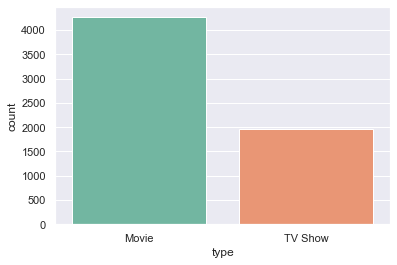

In [75]:
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

## Which months are the best (in terms of least competition with other new titles) to release new titles? 

In [76]:
netflix_dates = netflix_overall[['date_added']].dropna()
print(netflix_dates.head())

          date_added
0  September 9, 2019
1  September 9, 2016
2  September 8, 2018
3  September 8, 2018
4  September 8, 2017


In [77]:
netflix_dates['year'] = netflix_dates['date_added'].apply(lambda x : x.split(',')[-1])
#quick check on the year values
print(netflix_dates['year'].value_counts())

 2019    2349
 2018    1782
 2017    1300
 2016     456
 2020     184
 2015      90
 2014      25
 2011      13
 2013      12
 2012       7
 2009       2
 2008       2
 2010       1
Name: year, dtype: int64


In [78]:
netflix_dates['month'] = netflix_dates['date_added'].apply(lambda x : x.strip().split(' ')[0])
#quick check on the month values
print(netflix_dates['month'].value_counts())

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
Name: month, dtype: int64


In [79]:
print(netflix_dates.head())

          date_added   year      month
0  September 9, 2019   2019  September
1  September 9, 2016   2016  September
2  September 8, 2018   2018  September
3  September 8, 2018   2018  September
4  September 8, 2017   2017  September


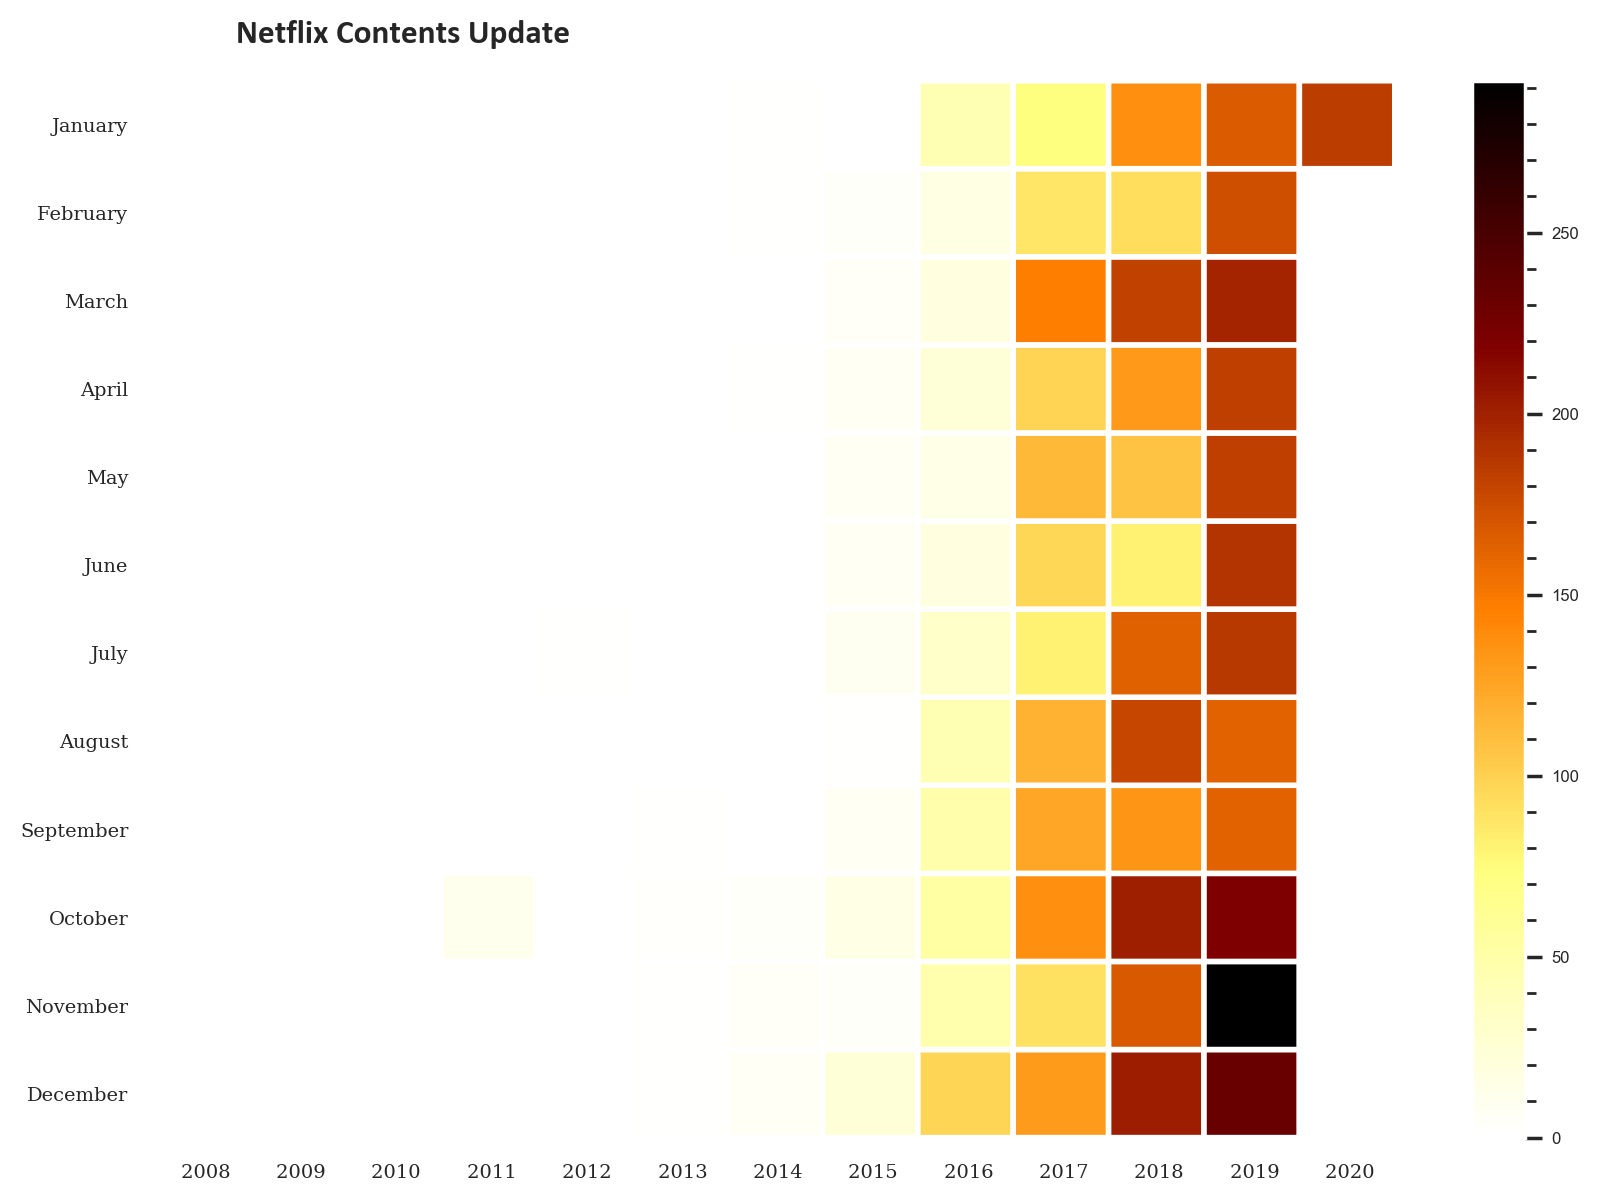

In [80]:
#in month_order list, the double colon with a negative 1 is to reverse the list
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_dates.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1),df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.2, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=6) 
cbar.ax.minorticks_on()
plt.show()

#the above codes are from https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda/log

If the latest year 2019 is considered, August and September seem to be the better months to release new titles.

## Rating analysis

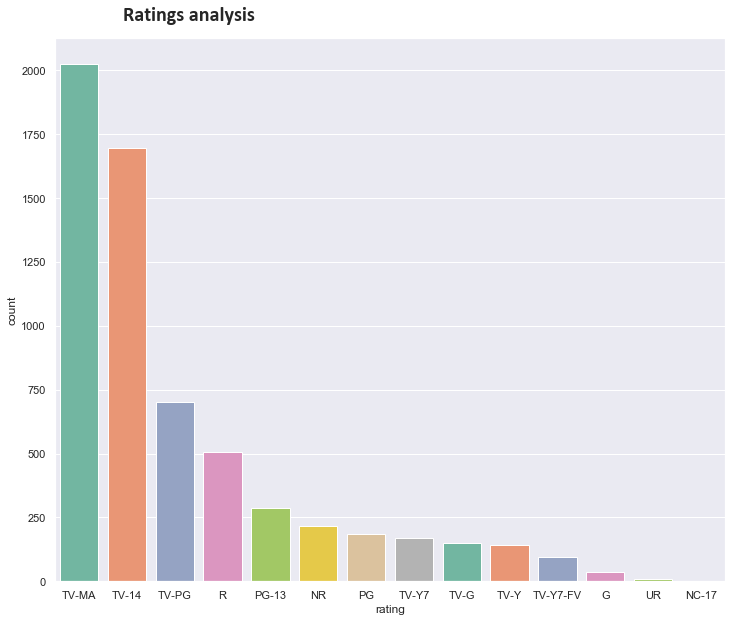

In [81]:
netflix_ratings = netflix_overall.dropna(subset=['rating'])
plt.figure(figsize=(12,10))
ax = sns.countplot(x='rating',data=netflix_ratings,order=netflix_ratings['rating'].value_counts().index[0:15],palette="Set2")
ax.set_title('Ratings analysis',fontsize=20, fontfamily='calibri', fontweight='bold', position=(0.2, 1.0+0.02))
plt.show()

From the count plot above, we could see that the top 3 categories are TV-MA, TV-14 and TV-PG.

TV-MA: For mature audience only. This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.  
TV-14: Parents strongly cautioned. This program contains some material that many parents would find unsuitable for children under 14 years of age.  
TV-PG: Parental guidance suggested. This program contains material that parents may find unsuitable for younger children. 

Source: https://pediatrics.aappublications.org/content/138/3/e20160487

Without diving deep into the age groups of Netflix viewers, it is not unreasonable that most Netflix contents are catered to adults, instead of young kids as Netflix requires monthly paid subscriptions which might pose a barrier to younger populations without/with less earning power.

### Which country produces the most content?

In [82]:
contents_by_countries = netflix_overall['country'].value_counts()
top_countries= contents_by_countries[0:10]

In [83]:
df = pd.DataFrame(top_countries).reset_index().rename(columns={'index':'country',
                                                          'country':'number of titles'})

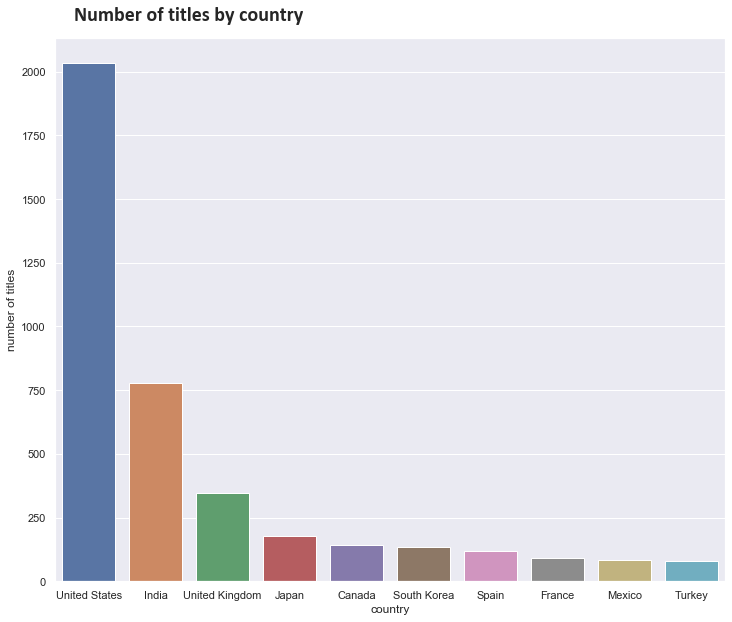

In [84]:
plt.figure(figsize=(12,10))
ax = sns.barplot(x='country',y='number of titles',data=df)
ax.set_title('Number of titles by country',fontsize=20, fontfamily='calibri', fontweight='bold', position=(0.2, 1.0+0.02))
plt.show()

Another way to visualize it with plotly

In [85]:
import plotly.express as px
fig = px.funnel(df,x='number of titles',y='country')
fig.show()

We can see that the United States being a really strong player in the film making industry, having a huge lead in the number of titles produced as compared to other countries. Interestingly, China is not on the list despite being the country with the largest population.

## Building a recommender system

To do this, we could assess the descriptions of each title to identify similar titles. To compare the descriptions of the titles, we could utilize term frequency - inverse document frequency (tf-idf).

How does the recommender function work?
1. Take a movie title, cosine similarity matrix and indices series as arguments.
2. Extract pairwise cosine similarity scores for the movie.
3. Sort the scores in descending order.
4. Output titles corresponding to the highest scores.
5. Ignore the highest similarity score (of 1).

In [86]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Create TfidVectorizer object and remove stopwords
vectorizer = TfidfVectorizer(stop_words='english')
#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')
# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(netflix_overall['description'])
print(tfidf_matrix.shape)

(6234, 16151)


In [87]:
# Import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
# Generate cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [88]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title'])
len(indices)

6234

In [89]:
def get_recommendations_new(title, cosine_sim=cosine_sim,top_n=5):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the n most similar movies
    sim_scores = sim_scores[1:top_n+1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top n most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [90]:
get_recommendations_new('Transformers Prime')

3                   Transformers: Robots in Disguise
5410                                  Beyond Skyline
854                                   Chappaquiddick
382     Naruto Shippûden the Movie: The Will of Fire
638                           The Night Comes for Us
Name: title, dtype: object

### Limitations

One of the limitations for this model is that it does not work when there is duplicate of the title name. Refer to the example below.

In [91]:
get_recommendations_new("Limitless")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
netflix_overall[netflix_overall['title']=='Limitless']

It returns an error when we try to get recommendations for the title "Limitless" as 3 different titles share this same name. 